## Background / Motivation


Early on in the pandemic, people had to deal with their travel plans being upended overnight. On the consumer side, we knew that the process involved the disappointment of canceling flights and hotel reservations, but we were curious about the effects on businesses like airlines and hotels. We were particularly curious about hotel booking cancellations and how these impact hotels during non-pandemic times, since we know that the impact during the pandemic was drastic.

Today, hotels tend to provide free or low-cost cancellation services for customers who cannot follow through with their bookings. However, this can become problematic for the hotel if customers abuse cancellation services and can result in a loss of profit. While hotels could address this issue by overbooking hotel rooms, they run the risk of losing business and upsetting customers if they fail to overbook the correct amount. An incorrect approach to overbooking could also result in the hotel having to book their customer a room in a different hotel, leading to an even higher cost. 

## Problem statement 


We are interested in predicting the probability of a random hotel guest cancelling their booking at an INN hotel. This is a prediction problem. We are also interested in developing a formula for the INN hotel chain to use when calculating how much they should overbook, which could help them maximize profit. 

## Data sources 


We used a dataset from Kaggle with approximately 36,000 observations and 18 variables. Each observation corresponds to a hotel booking within the INN hotel chain made in 2017 or 2018. The dataset includes information about the hotel bookings such as the length of stay, number of guests, and whether the reservations were cancelled. 

Here is the link to the dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

## Stakeholders 


Our two key stakeholders are hotel managers and the INN hotel chain. Our success matters to the hotel manager because they would be able to identify the probability of a customer cancelling their reservation to navigate overbooking. Meanwhile, the INN hotel chain cares because our success would help them maximize their profit by minimizing the loss from having empty rooms across their hotels.

## Data quality check / cleaning / preparation


The dataset consisted of 36275 observations of 18 different variables, one being booking ID, 10 being continuous, and 7 being categorical. The dataset contained no missing values as it was presumably cleaned and processed by the Kaggle contributors from where it was sourced. Our response variable `booking_status` consisted of 67.24% not canceled and 32.76% canceled bookings. The distributions of all 10 continuous variables are displayed below. 

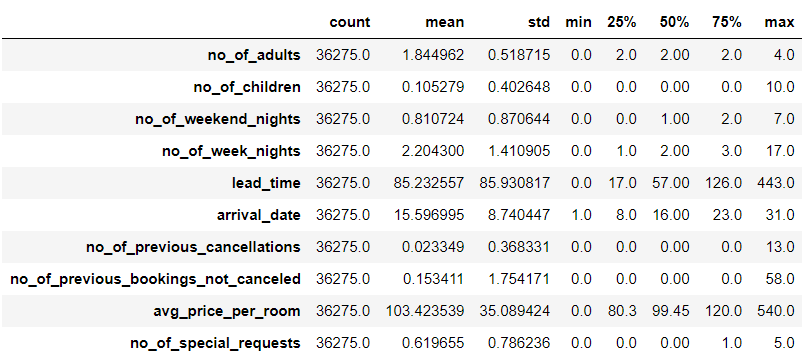

We also looked at the possibility of adding new predictors to the data from exiting ones and see how adding these would impact our models. The two variables we added were seasons and holidays being as these two are factors that could influence hotel bookings and therefore cancellations, the % of observations is shown below.

The frequency counts of all 7 categorical variables are displayed below. Non-binary categorical predictors, which included `market_segment_type`, `room_type_reserved`, `arrival_month`, and `type_of_meal_plan` were converted to dummy variables for inclusion in the various models. 

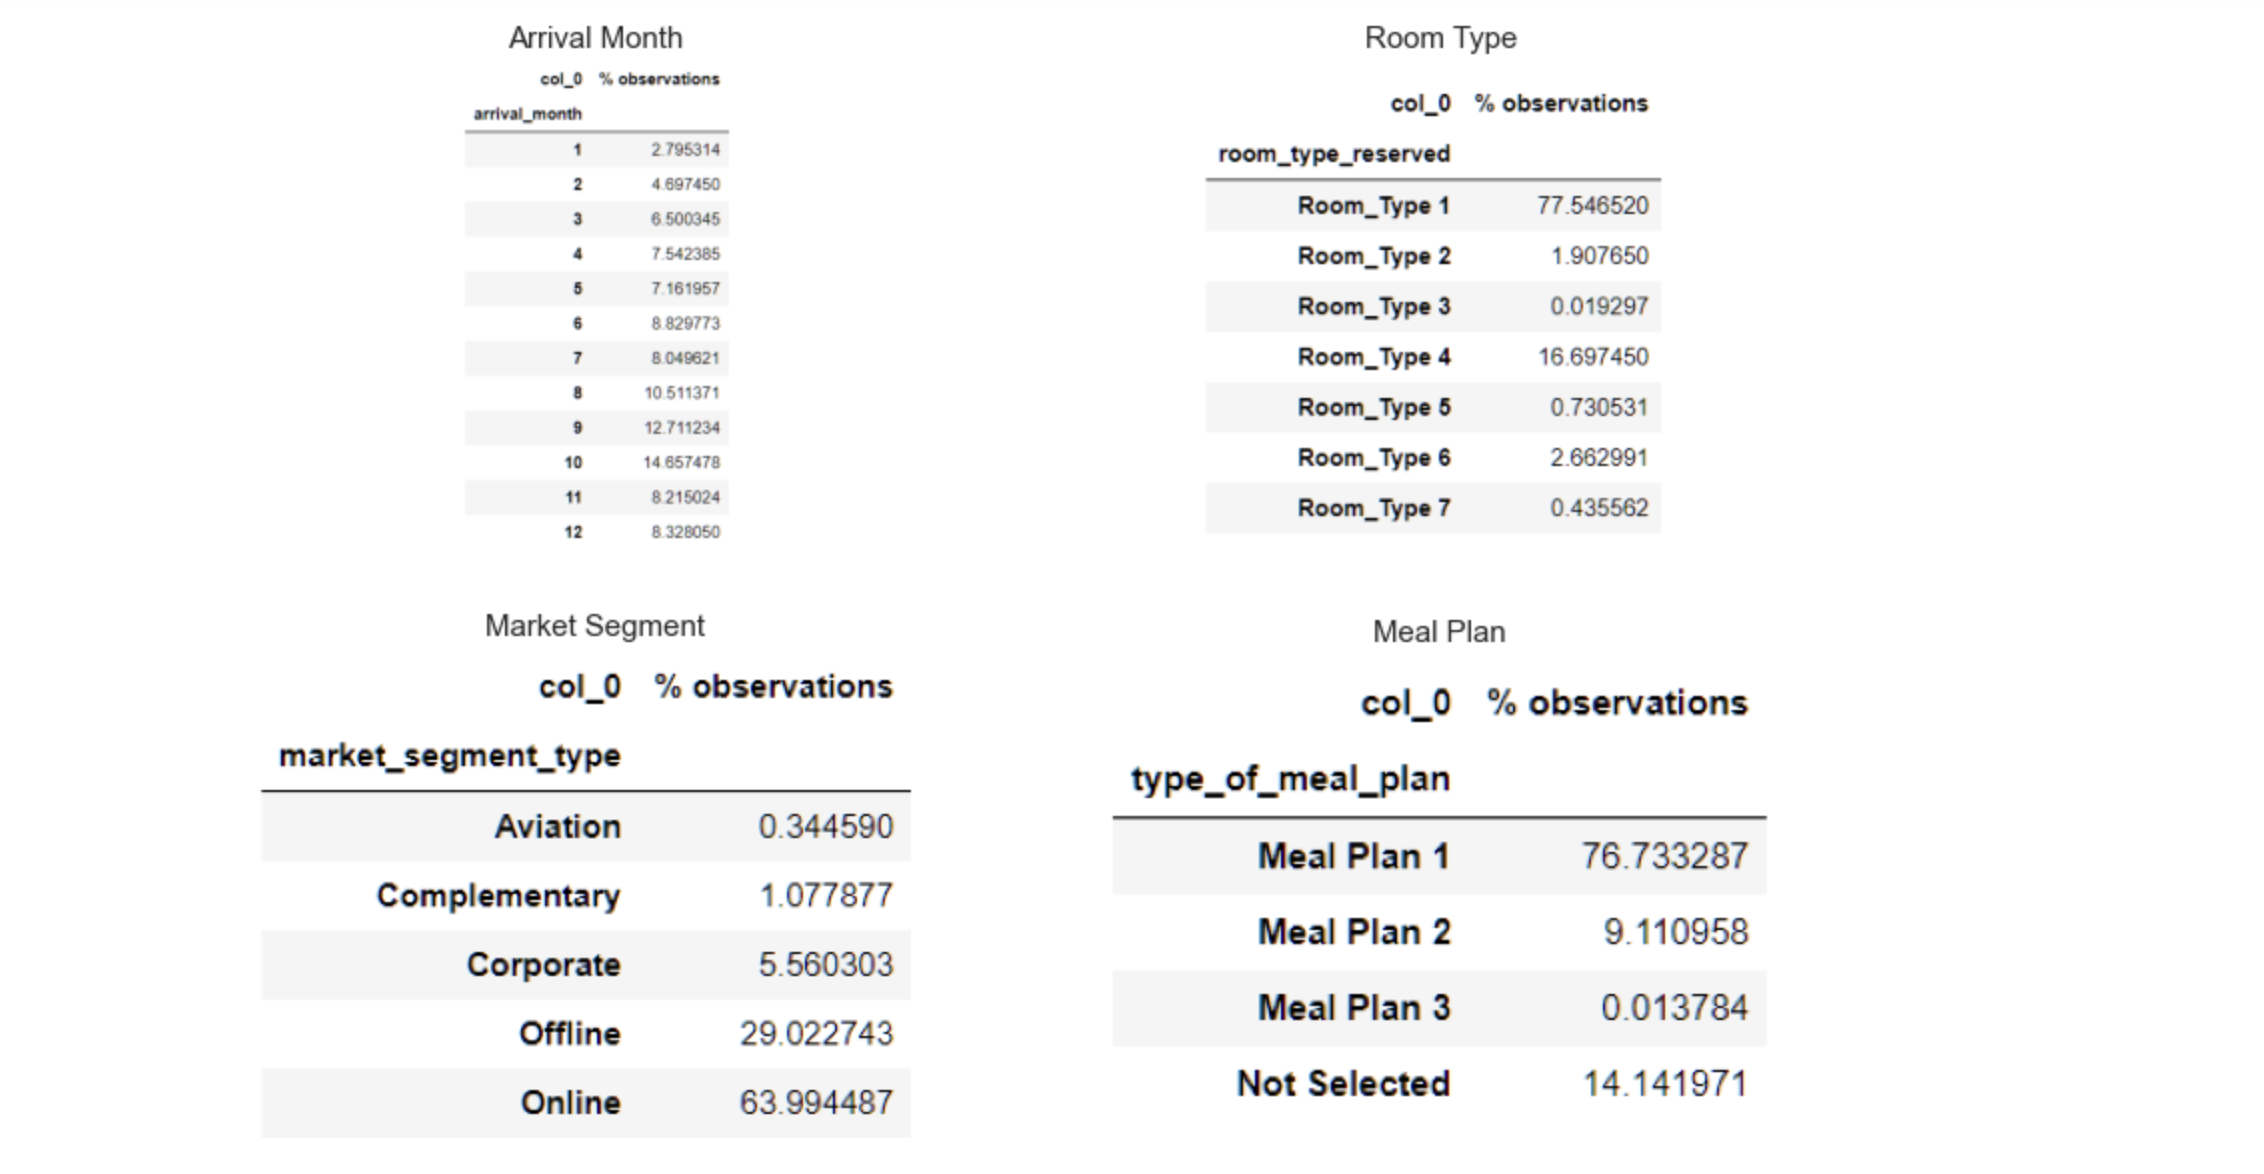

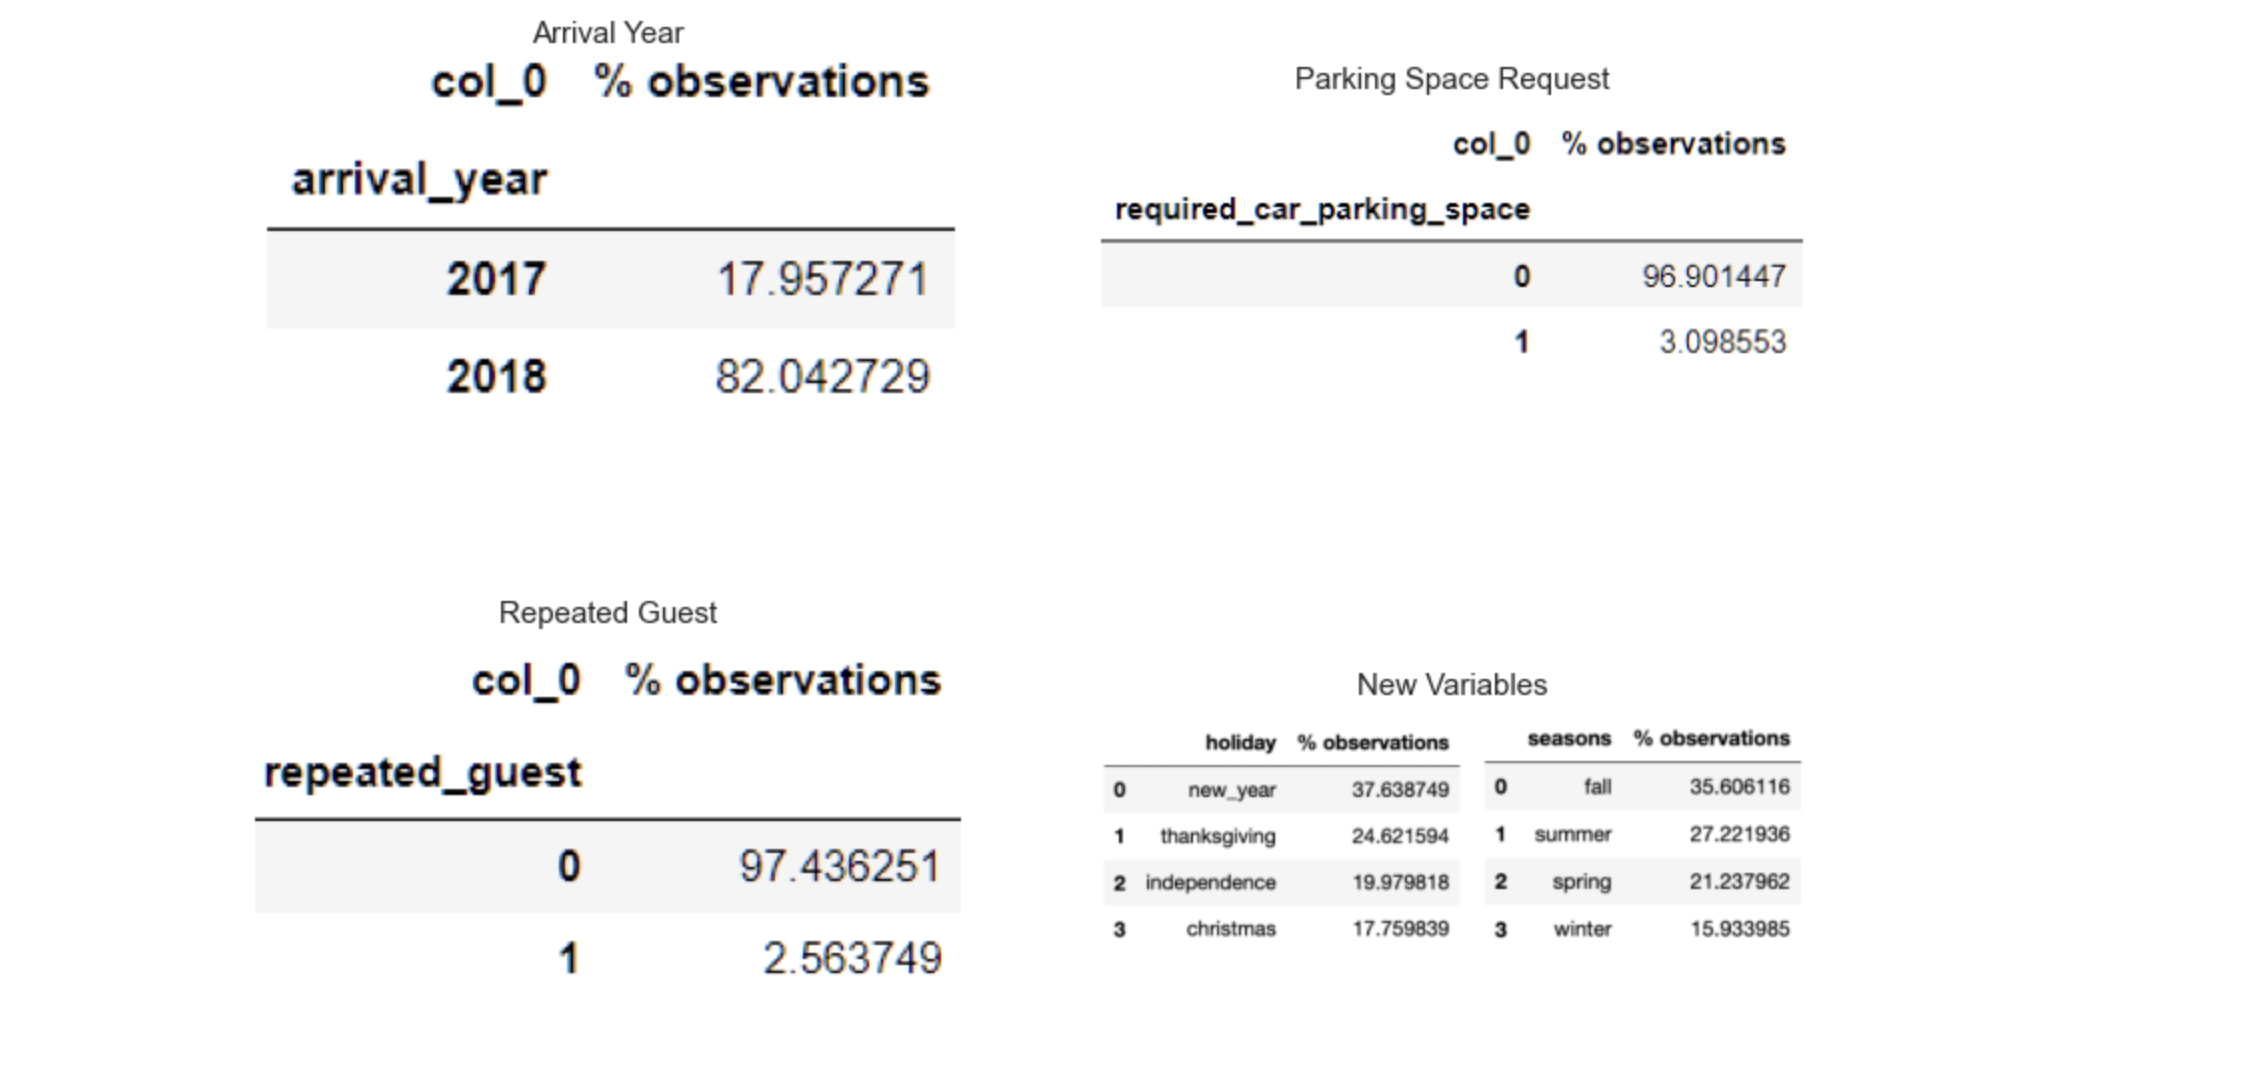

## Exploratory data analysis

The key takeaways from our exploratory data analysis are listed below.
- Lead time, average price per room, and number of special requests were identified as the most significant continuous predictors based on their relatively high correlations with the response. 
- Lead time and average price per room also showed different distributions among canceled versus not canceled observations. Number of weekend nights was identified as a potentially important predictor based on these visualizations as well. 
- The distribution of lead time was significantly skewed, suggesting that log transformation of the predictor would be useful in fitting the model. 
- Binned values of lead time and average price room also displayed high variance when plotted with the response, further justifying the usefulness of log transformations. 

### Identifying Significant Predictors and Their Relationships 
Correlations of lead time, average price per room, and number of special requests with the response were 0.438538, 0.142569, and -0.253070, respectively. The relationship between the response and all numeric predictors is plotted below. 

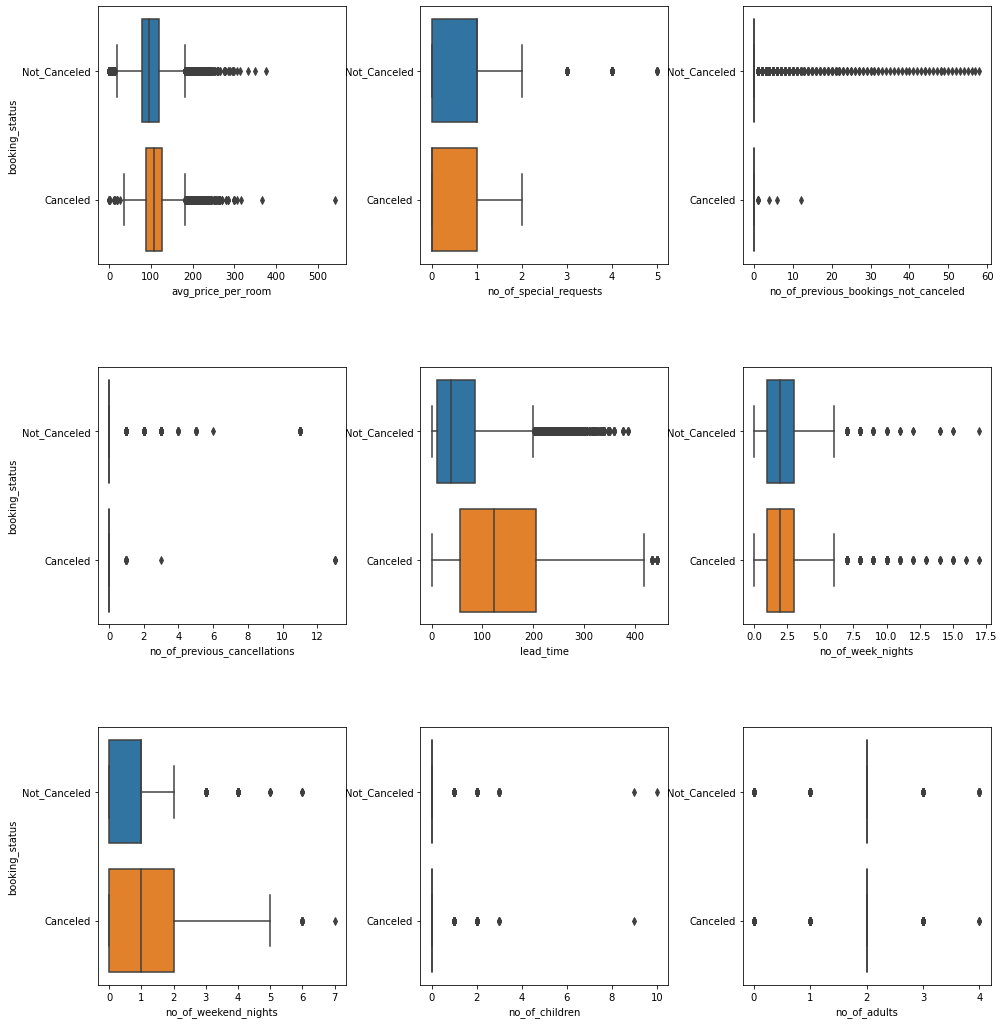

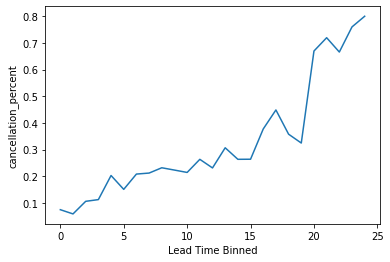

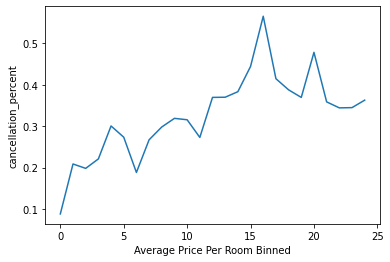

The relationship between the response and all categorical predictors are displayed below.
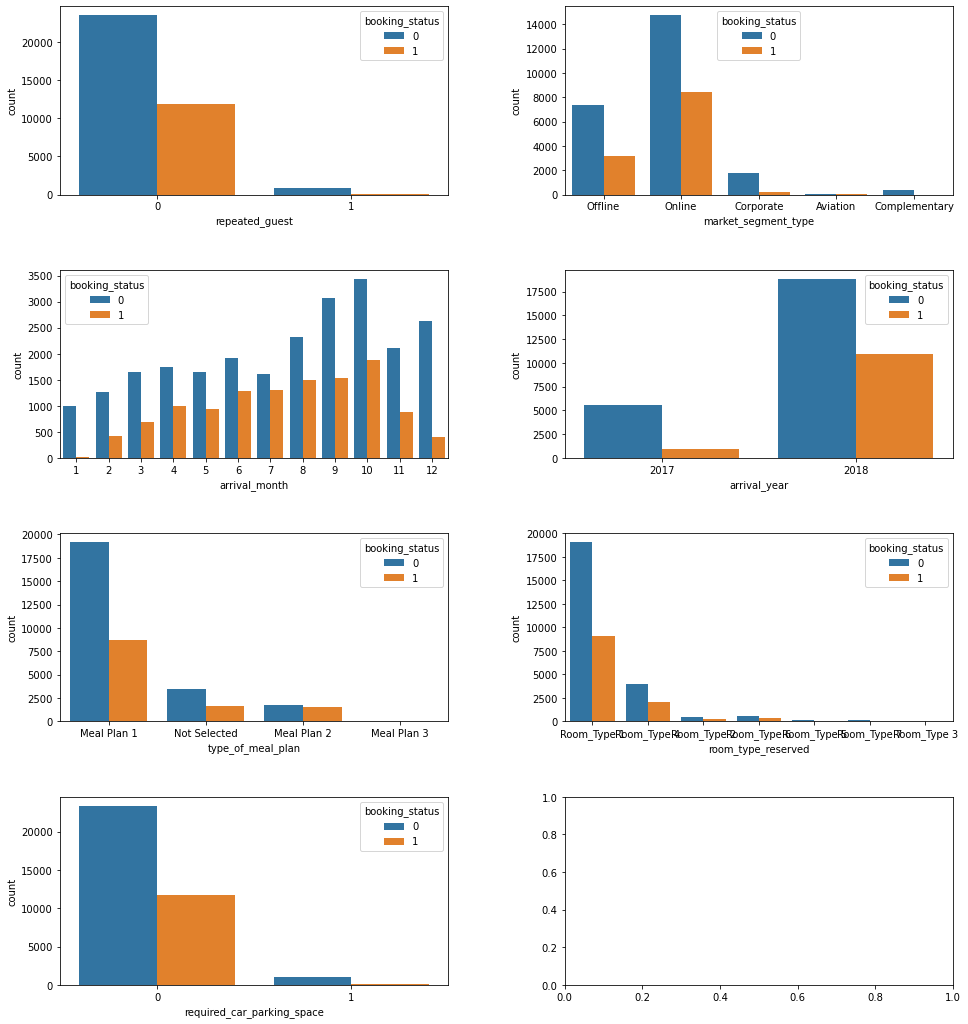

### Assessing Multicollinearity 

There was no significant multicollinearity among the predictors other than that excepted from the categorical predictors that were converted to dummy variables in the dataset. 

### Assessing Autocorrelation

We were interested in identifying whether there was a significant relationship between a guest's arrival month and number of cancellations. To explore this, we plotted the number of overall bookings against each month and noted the number of cancelled and not cancelled bookings in the stacked barplot below.

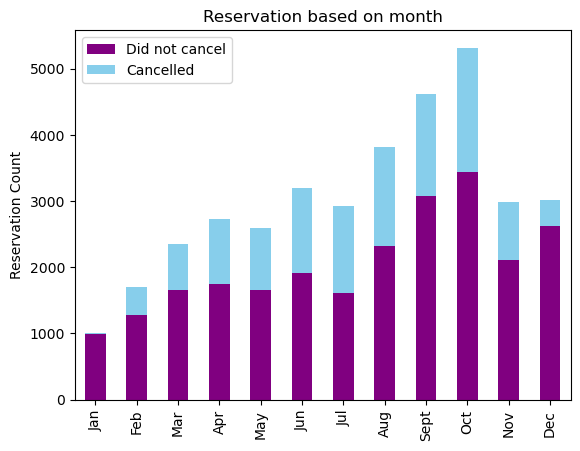

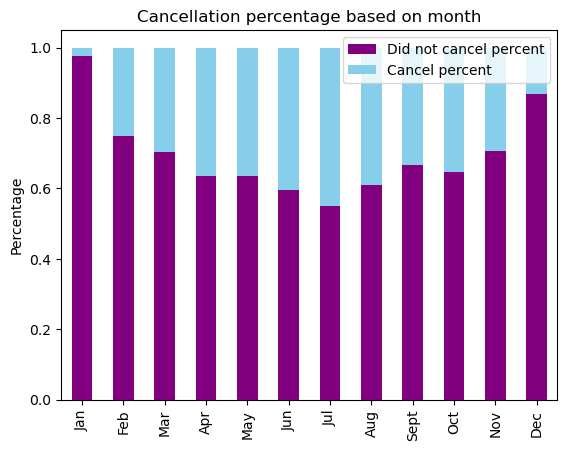

We observed similar cancellation rates across all months with the exception of January and December. While July has a slightly higher cancellation rate, we conclude that it is not high enough to be significant. Overall, we can see a correlation between the total number of bookings and month of the year, but there seems to be no significant correlation between month and booking cancellation rate. 

## Approach


Since we are dealing with a classification problem, we focused on developing an effective logistic regression model. Hotel guests either cancelled their hotel bookings (cancelled = 1) or did not cancel (not_cancelled = 0). We wanted to primarily minimize FNR and increase the prediction accuracy of our model. FNR represents the rate we predict someone will not cancel their booking but they actually do, and this would negatively affect our overbooking strategy. 

We began our approach by developing a baseline model, which we tried to improve by implementing new variable and variable transformations derived from our EDA. Our baseline model had an accuracy of 80% and an FNR of 34%, so we struggled to develop models that out-performed this baseline model's accuray. We tried adding new variables, some of which had issues with multicollinearity. After correcting this multicollinearity, the model we developed by combining our baseline model and our new variables performed relatively the same as our original baseline model. 

Next, we tried developing a model with binned variables and interactions based on trends obsereved in our EDA, but these models still did not perform as well as the baseline. We then began to try other techniques including forward and backward variable selection. At the same time, we attempted to build upon existing solutions from Kaggle [1] and applied the KNN techniques from those solutions in combination with our existing EDA-based and variable selection models in an attempt to improve our model accuracy and minimize our FNR. The models we created based on these existing solutions did not perform better than the source models and produced a slightly better accuracy than our baseline model. However, these models did not minimize our FNR, which was our metric of interest. Finally, we also tried developing lasso and ridge regression models. 


## Developing the model

We began model development based on EDA-derived insights. The three continuous predictors that showed relatively high correlations with the response were found to be `lead_time`, `no_of_special_requests`, and `avg_price_per_room` (corr: 0.44, -0.25, and 0.14, respectively). The distributions of `lead_time` and `avg_price_per_room` were skewed, and plotting the response against the binned values of those predictors showed high variation in the relationship. Therefore, log transformations of those two variables were included in the first EDA-based model along with `no_of_special_requests` (accuracy 75.9, FNR 31.3). Additional EDA-based models were developed based on the correlations of categorical variables with the response variable, leading to the inclusion of `repeated_guest` (corr:-0.11) as a predictor (accuracy 75.0, FNR 31.1). In subsequent EDA-based models, interactions with significant predictors were included based on intuition (e.g., `no_of_adults` and `avg_price_per_room`, `no_of_weekend_nights` and `avg_price_per_room`) (accuracy 74.6, FNR 31.5). None of the EDA-based models produced significant improvements over the baseline. Thus, the simplest EDA-based model with three predictors was selected out of this group. 

To enhance the rigor of our approach, we performed variable selection using both forward and backward stepwise selection and assessing model performance based on the BIC criterion. Forward selection using all continuous and categorical variables, after accounting for collinearity, produced a best model (accuracy 79.3, FNR 29.4) with 20 predictors. Backward selection also produced a best model with 20 predictors, but slightly higher FNR (accuracy 79.3, FNR 29.6). Thus, forward selection was selected as the best model from this approach. Variable selection with predictors and their 2-factor interactions was also attempted. However, additional collinearity introduced by interaction terms (singular matrix error) resulted in unsuccessful variable selection both in cases where only the 20 predictors selected from forward selection and when only the continuous and binary categorical variables were tested. 

K-Nearest Neighbors with k=5 was then tested based on an existing Kaggle report. The result produced reasonable accuracy, but high FNR on test data (accuracy 79.6, FNR 40.1). In an attempt to improve this model, KNN was performed using the 20 variables selected from forward selection (accuracy 81.1, FNR 36.6). Although model accuracy improved, FNR was still subpar in comparison to the baseline. 

Because prior attempts did not produce the desired results, we also attempted regularization methods which can help reduce variance of coefficient estimates. The tuning parameter for Ridge was quite high at 15.8, indicating that high shrinkage penalty was called for in the data. The Lasso tuning parameters was significantly smaller at 0.000146. The Ridge (accuracy 76.1, FNR 27.4) and Lasso (accuracy 76.1, FNR 27.6) models produced the best overall FNR. Therefore, the final model equation was selected based on the Ridge coefficient estimates. 

**Final Model Equation:** 

log(p/(1-p)) = 0.3257369697860763 + 9.00205450e-03(no_of_adults) + 1.37725085e-02(no_of_children) + 1.44447131e-02(no_of_weekend_nights) + 1.10736898e-02(no_of_week_nights) + -2.66110857e-02(required_car_parking_space) +  2.14746125e-01(lead_time) + 2.04008754e-02(arrival_year) +  3.24551761e-03(arrival_date) + 1.93295230e-04(repeated_guest) + -3.68281613e-04(no_of_previous_cancellations) +  8.16056221e-03(no_of_previous_bookings_not_canceled) +  8.59128204e-02(avg_price_per_room) + -1.58255462e-01(no_of_special_requests) +  2.02786830e-02(Complementary) + -1.73167913e-02(Corporate) + -9.24012423e-02(Offline) + 2.50819329e-02(Online) + -2.60412159e-02(January) +  1.10649176e-02(February) +  8.23050132e-03(March) + -9.65631462e-03(May) + -2.08531390e-03(June) + -5.05380682e-03(July) + -2.73295739e-03(August) +
-1.35263176e-02(September) +  1.24881146e-05(October) +  1.01144727e-02(November) + -4.12111227e-02(December) + -1.49383179e-02(MealPlan1) + -3.96362792e-03(MealPlan2) + -1.95490470e-04(NotSelected) +  4.26849529e-02(Room_Type1) + 1.00447424e-02(Room_Type2) +  1.81212996e-03(Room_Type3) +  2.97467576e-02(Room_Type4) +  1.55849662e-03(Room_Type5) + -2.02825577e-03(Room_Type6)


Given that none of the models yielded significant improvements over the baseline, we explored the possibility of combining the predictions of our best performing models to see if a majority vote approach could produce more accurate results. We accomplished this by using a Python function to merge the predictions of each individual model into a single DataFrame, where if the majority of the predictions were 1, we would make a final prediction of 1. This approach allowed us to ensure that even if one model failed to identify a trend, another model could still capture it, thus increasing our chances of producing accurate predictions. This approach had (accuracy 78.9, FNR 39.9), which was not better than our Ridge Regression model. 

## Limitations of the model with regard to inference / prediction

It should be noted that our dataset only consisted of data from 2018 and a portion of 2017, therefore, caution should be exercised when utilizing our model for predicting future hotel bookings. Although our best model achieved a classification accuracy of 76.1%, which was lower than our baseline model's accuracy of 80.2%, it did prove to be more effective in minimizing the False Negative Rate (FNR). Specifically, our best model, which was developed using ridge regression, significantly reduced the FNR to 27.4%, as compared to the baseline model's FNR of 34.4%.

We chose to prioritize minimizing FNR rather than maximizing accuracy because we cared about minimizing the hotel chain's profit loss, which meant minimizing the number of bookings we predicted to be not cancelled that were actually cancelled. Through our EDA, we identified lead time to be a significant predictor of hotel booking cancellation and it was also a significant predictor in our model. Since we did not encounter a hotel booking made more than 443 days before guest arrival, we do not recommend using our model to predict the cancellation of a booking made any farther in advance than 443 days. Since most of our observations consist of bookings made under 126 days in advance, we recommend that the hotel chain proceed with caution when predicting cancellation probabilities for bookings made farther in advance than 126 days. 

When it comes to collecting the data to run our prediction model, we believe that all the data necessary are easily accessible to the hotels. All of the data necessary for our model can be collected through customer hotel bookings and tracked in a booking database (for predictors like number of previous cancellations). As long as the hotels keep lead time restrictions in mind, are careful about extrapolating our model to data from beyond 2017/2018, and collect all necessary data through booking and reservation forms, we believe that our model can be useful.

## General Conclusions, Overbooking and Stakeholder Recommendations

Currently, most hotels overbook anywhere between 2-3% of their capacity, not exceeding 10-15%. The higher the overbooking percentage, the more likely a customer is to have to be re-booked to a different hotel. This would lead to customer dissatisfaction due to the constant moving pieces as well as the INN hotel losing that customer's business to a different hotel. 

The true positive rate is approximately 60%, which means that 60% of the bookings we predict to be cancelled will be cancelled. To be on the side of caution, we recommend overbooking approximately 50% the number of predicted cancellations for the night.

In addition, the true negative rate or the specificity of the model is 1 - FPR = ~90%, which means that approximately 90% of bookings predicted to be followed through with are actually followed through with. This means that using our model, we will incorrectly predict about 10% of bookings that are going to be followed through with. Once again, to play it safe, we would recommend overbooking approximately 2% the number of customers predicted to follow through for the night. This would be best for the hotel to maximize their profit. 

Our stakeholders, the INN hotel chain and individual hotel managers, are directly impacted by our findings. To make the best use of our model, the INN hotel chain should test how our model performs using more current (2022-2023) booking data, and implement our overbooking recommendations in a select number of hotels to gauge their efficiency. Meanwhile, hotel managers should continue collecting current booking data to be used when testing our model performance on recent bookings and cancellations. In addition, managers would be in charge of tracking booking cancellation rates and therefore also managing overbooking. For managers of the hotels where the chain decides to try our overbooking strategy, we recommend they implement it with caution and update overbooking rates according to more current booking data as they become available. They should also keep in mind our model's limitations when it comes to advanced bookings, and refrain from using our model or implementing our recommendations on bookings made more than 443 days in advance.

Further research on this subject should focus on identifying the most important predictors for predicting a hotel booking cancellation. Since we chose to focus our efforts on prediction, our best models are not suited for providing insight on what leads a booking to be cancelled. We believe this information could significantly benefit our stakeholders especially when paired with our developed models and overbooking recommendations.


## GitHub and individual contribution {-}

**Github link**: https://github.com/LinhNgaNguyen/STAT303-2-Project

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Hoda Fakhari</td>
    <td>Data preparation, EDA, Model development </td>
    <td>Prepared categorical variables for analysis, developed visualizations to identify significant predictors and appropriate variable transformations, developed multiple models.</td>
    <td>27</td>
  </tr>
  <tr>
    <td>Elena Llaguno Cantu</td>
    <td>Data preparation, Identifying outliers, model with new variables, function to combine models</td>
    <td>Created new variables (seasons and variables) and visualizations to assess their relationships, model with new variables, studentized residuals plot, developed function to combine predictions from all models.</td>
    <td>20</td>
  </tr>
    <tr>
    <td>Luna Nguyen</td>
    <td>Outlier and influential points treatment</td>
    <td>Identified outliers/influential points and analayzed their effect on the model.</td>
    <td>100</td>    
  </tr>
    <tr>
    <td>Kiara Villalobos-Hernandez</td>
    <td>Preliminary autocorrelation work, created baseline model, edited report</td>
    <td>Conducted EDA and data cleaning with the goal of identifying autocorrelation (didn't make it into final product), created baseline model, primary project report editor</td>
    <td>32</td>    
  </tr>
</table>

Using GitHub did make collaboration easier. Our group did not experiment with creating different branches, but everyone was communicative about when they would be working on certain files and that made collaborating on GitHub really efficient. In the future, we might consider experimenting with different branches and merging them. 

## References {-}


[1] TKHARITONISHVILI. LG_Reg, XGB, KNN, D_Tree--max Accuracy = 0.88, 2023. Kaggle Notebook. Supplied as additional material.

[2] AHSAN RAZA. Hotel Reservations Dataset. Kaggle Dataset. Supplied as additional material.

